In [40]:
#pip install egttools

In [41]:
#pip install -U egttools

Requirement already up-to-date: egttools in c:\users\zxcas\anaconda3\lib\site-packages (0.1.10.dev2)
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip list

Package                            Version
---------------------------------- -------------------
absl-py                            0.11.0
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.10.0
anaconda-project                   0.8.3
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.4.2
astropy                            4.0.2
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.4
Babel                              2.8.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                            

In [43]:
#import sys
#import pprint

#pprint.pprint(sys.path)

xarray                        0.20.1
xlrd                          2.0.1
XlsxWriter                    3.0.3
xlwings                       0.24.9
yapf                          0.31.0
yarl                          1.6.3
zict                          2.0.0
zipp                          3.7.0
zope.interface                5.4.0


In [34]:
from egttools.analytical import replicator_equation
from egttools.analytical.utils import (calculate_gradients, find_roots, check_replicator_stability_pairwise_games,)
from egttools.plotting import plot_gradients

In [35]:
# Payoff matrix
V = 2; D = 3; T = 1
A = np.array([
        [ (V-D)/2, V],
        [ 0      , (V/2) - T],
    ])

In [36]:
nb_points = 101
strategy_i = np.linspace(0, 1, num=nb_points, dtype=np.float64)

In [37]:
# Calculate gradient
gradient_function = lambda x: replicator_equation(x, A)
gradients = calculate_gradients(np.array((strategy_i, 1 - strategy_i)).T, gradient_function)

In [38]:
roots = find_roots(gradient_function, 2, nb_initial_random_points=10, method="hybr")
stability = check_replicator_stability_pairwise_games(roots, A)

AttributeError: 'collections.OrderedDict' object has no attribute 'top'

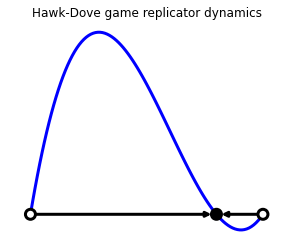

In [42]:
plot_gradients(gradients[:, 0], figsize=(5,4), fig_title="Hawk-Dove game replicator dynamics", 
               xlabel="frequency of hawks", roots=roots, stability=stability)
plt.show()

AttributeError: 'collections.OrderedDict' object has no attribute 'top'

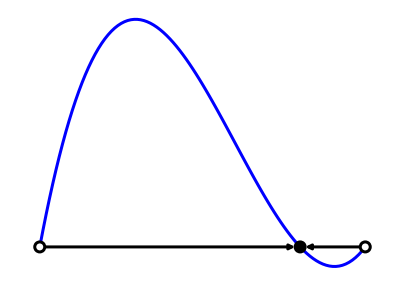

In [40]:
import numpy as np
import egttools as egt
from egttools.analytical.utils import (calculate_gradients, find_roots, check_replicator_stability_pairwise_games, )

# Calculate gradient
payoffs = np.array([[-0.5, 2.], [0., 0]])
x = np.linspace(0, 1, num=101, dtype=np.float64)
gradient_function = lambda x: egt.analytical.replicator_equation(x, payoffs)
gradients = calculate_gradients(np.array((x, 1 - x)).T, gradient_function)

# Find roots and stability
roots = find_roots(gradient_function, nb_strategies=2, nb_initial_random_points=10, method="hybr")
stability = check_replicator_stability_pairwise_games(roots, A)
# Plot the gradient
egt.plotting.plot_gradients(gradients[:, 0], xlabel="frequency of hawks", roots=roots, stability=stability)


ValueError: shapes (2,2) and (3,1000) not aligned: 2 (dim 1) != 3 (dim 0)

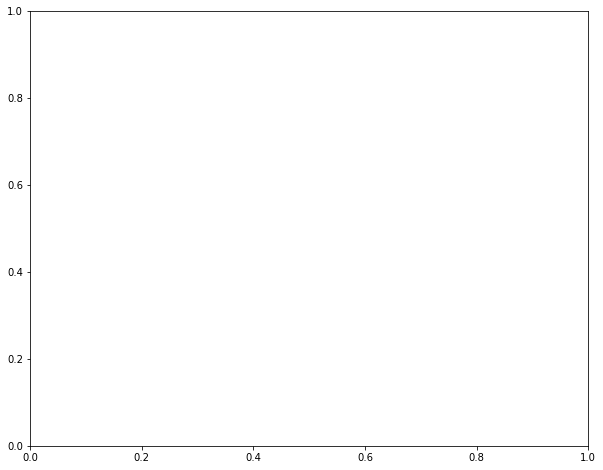

In [25]:
import matplotlib.pyplot as plt
from egttools.plotting.simplified import plot_replicator_dynamics_in_simplex
payoffs = np.array([[-.5, 2, 0], [0, 0, 2], [0, 1, 0]])
type_labels = ['Hawk', 'Dove', 'Human']

# Create figure
fig, ax = plt.subplots(figsize=(10,8))

# calculate the gradients and roots
simplex, gradient_function, roots, roots_xy, stability = plot_replicator_dynamics_in_simplex(A, atol_equal=1e-2, ax=ax)

plot = (simplex.draw_triangle()
        .add_vertex_labels(type_labels, epsilon_bottom=0.1)
        .draw_stationary_points(roots_xy, stability)
        .draw_gradients(zorder=0)
        .add_colorbar()
        .draw_scatter_shadow(gradient_function, 100, color='gray', marker='.', s=0.1))

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05,1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))


In [ ]:
from egttools.plotting.helpers import (xy_to_barycentric_coordinates, 
                                       barycentric_to_xy_coordinates,
                                       calculate_stationary_points, 
                                       calculate_stability,find_roots_in_discrete_barycentric_coordinates)
from egttools.helpers.vectorized import vectorized_replicator_equation, vectorized_barycentric_to_xy_coordinates

In [26]:
payoffs = np.array([[1, 0, 0],
                    [0, 2, 0],
                    [0, 0, 3]])

In [27]:
simplex = egt.plotting.Simplex2D()

In [28]:
v = np.asarray(xy_to_barycentric_coordinates(simplex.X, simplex.Y, simplex.corners))

In [29]:
results = vectorized_replicator_equation(v, payoffs)
xy_results = vectorized_barycentric_to_xy_coordinates(results, simplex.corners)
Ux = xy_results[:, :, 0].astype(np.float64)
Uy = xy_results[:, :, 1].astype(np.float64)   

In [30]:
calculate_gradients = lambda u: egt.analytical.replicator_equation(u, payoffs)

roots, roots_xy = calculate_stationary_points(simplex.trimesh.x, simplex.trimesh.y, simplex.corners, calculate_gradients)
stability = calculate_stability(roots, calculate_gradients)

In [31]:
type_labels = ['A', 'B', 'C']

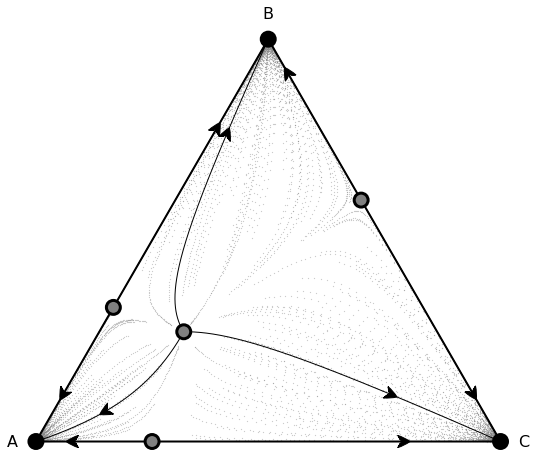

In [32]:
fig, ax = plt.subplots(figsize=(10,8))

plot = (simplex.add_axis(ax=ax)
           .apply_simplex_boundaries_to_gradients(Ux, Uy)
           .draw_triangle()
           .draw_stationary_points(roots_xy, stability)
           .add_vertex_labels(type_labels)
           .draw_trajectory_from_roots(lambda u, t: egt.analytical.replicator_equation(u, payoffs), 
                                       roots,
                                       stability,
                                       trajectory_length=15,
                                       linewidth=1,
                                       step=0.01,
                                       color='k', draw_arrow=True, arrowdirection='right', arrowsize=30, zorder=4, arrowstyle='fancy')
           .draw_scatter_shadow(lambda u, t: egt.analytical.replicator_equation(u, payoffs), 300, color='gray', marker='.', s=0.1)
          )

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05,1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))
plt.show()

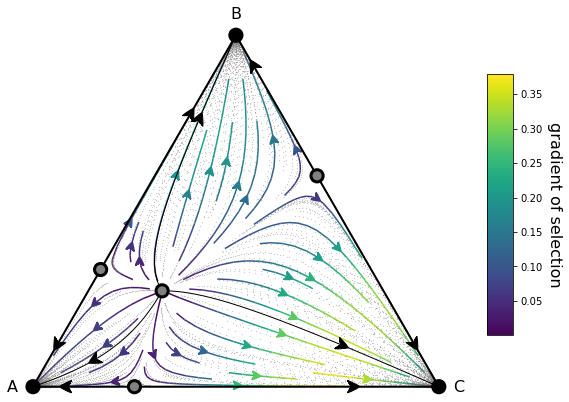

In [33]:
fig, ax = plt.subplots(figsize=(10,8))

plot = (simplex.add_axis(ax=ax)
           .apply_simplex_boundaries_to_gradients(Ux, Uy)
           .draw_triangle()
           .draw_gradients(zorder=0)
           .add_colorbar()
           .draw_stationary_points(roots_xy, stability)
           .add_vertex_labels(type_labels)
           .draw_trajectory_from_roots(lambda u, t: egt.analytical.replicator_equation(u, payoffs), 
                                       roots,
                                       stability,
                                       trajectory_length=15,
                                       linewidth=1,
                                       step=0.01,
                                       color='k', draw_arrow=True, arrowdirection='right', arrowsize=30, zorder=4, arrowstyle='fancy')
           .draw_scatter_shadow(lambda u, t: egt.analytical.replicator_equation(u, payoffs), 300, color='gray', marker='.', s=0.1, zorder=0)
          )

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05, 1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))
plt.show()